In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import amd

%load_ext autoreload
%autoreload 2

In [12]:
curr_path = Path().absolute()
dataset_parent = curr_path.parent.parent / 'datasets' / 'similarity-datasets'

data_key = 'Si_10'
cif_path = dataset_parent / 'CIFs' / f'{data_key}_cifs'
# get a list of cif files
cif_list = [entry for entry in cif_path.iterdir() if entry.is_file()]
# cif_list

In [13]:
# pick two examples to test
cif1 = cif_list[0]
cif2 = cif_list[1]
k = 10

import time
start_time = time.time()
dm = amd.compare(cif1, cif2, by='AMD', k=k)
print(f'k={k} : Time_elapsed = {time.time() - start_time:.1f} s')
print(dm)

k=10 : Time_elapsed = 0.0 s
            Li3Co2Si3O10
CaFe3Si2O9      0.308547


In [14]:
dm_10 = amd.compare(cif_list, cif_list, by='AMD', k=10)
dm_10

,CaFe3Si2O9,Li3Co2Si3O10,NaCa2ZrSi2O9,Ca9Si6(WO7)4,Li4V2Si(PO6)2,Na2TaAlSi(PO6)2,Er2Si2PbO8,KNaZrSi3H4O11,Zr2Ga2SiS5O24,Na15MgTa11(SiO4)18
CaFe3Si2O9,0.000000,0.308547,0.160769,0.124473,0.376072,0.322057,0.216484,0.276344,0.233400,0.285243
Li3Co2Si3O10,0.308547,0.000000,0.321138,0.345525,0.195753,0.290866,0.336225,0.299354,0.541946,0.353938
NaCa2ZrSi2O9,0.160769,0.321138,0.000000,0.155742,0.251186,0.212598,0.084615,0.361134,0.382077,0.156490
Ca9Si6(WO7)4,0.124473,0.345525,0.155742,0.000000,0.383137,0.329123,0.109911,0.324839,0.308794,0.292309
Li4V2Si(PO6)2,0.376072,0.195753,0.251186,0.383137,0.000000,0.190850,0.310177,0.260033,0.609471,0.253922
Na2TaAlSi(PO6)2,0.322057,0.290866,0.212598,0.329123,0.190850,0.000000,0.256163,0.172712,0.555457,0.086656
Er2Si2PbO8,0.216484,0.336225,0.084615,0.109911,0.310177,0.256163,0.000000,0.416850,0.299294,0.219349
KNaZrSi3H4O11,0.276344,0.299354,0.361134,0.324839,0.260033,0.172712,0.416850,0.000000,0.509743,0.233046
Zr2Ga2SiS5O24,0.233400,0.541946,0.382077,0.308794,0.609471,0.555457,0.299294,0.509743,0.000000,0.518643
Na15MgTa11(SiO4)18,0.285243,0.353938,0.156490,0.292309,0.253922,0.086656,0.219349,0.233046,0.518643,0.000000


In [20]:
figure_write_folder = curr_path.parent / 'figures' / 'test_amd'

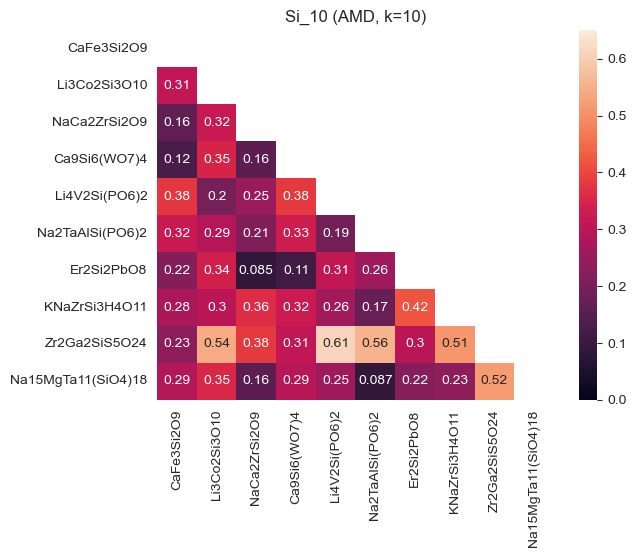

In [21]:
k = 10
# Generate a mask for the lower triangle
mask = np.triu(np.ones_like(dm_10, dtype=bool))
# Plot the heatmap with the mask
sns.heatmap(dm_10, mask=mask, annot=True, vmin=0, vmax=0.65)
plt.grid(False)
plt.title(f'{data_key} (AMD, k={k})')
plt.savefig(figure_write_folder / f'test_amd_{data_key}_{k}.png', dpi=300)
plt.show()

Comparing 10x10 PDDs (k=5): 100%|██████████| 100/100 [00:00<00:00, 729.33it/s]


k=5 : Time_elapsed = 0.2 s


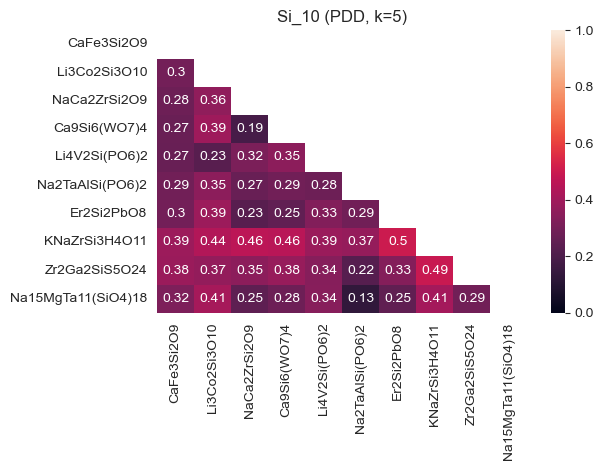

Comparing 10x10 PDDs (k=10): 100%|██████████| 100/100 [00:00<00:00, 614.69it/s]


k=10 : Time_elapsed = 0.2 s


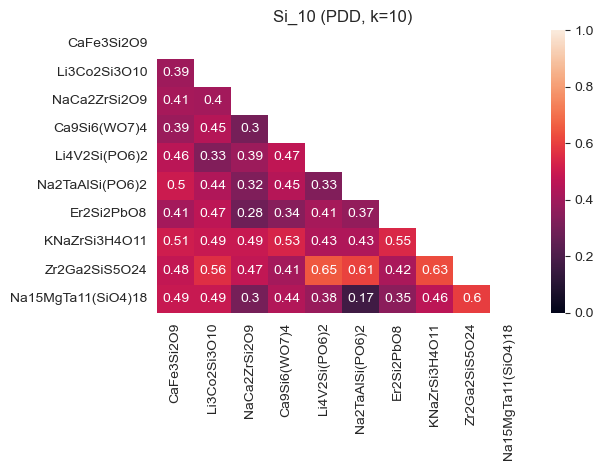

Comparing 10x10 PDDs (k=25): 100%|██████████| 100/100 [00:00<00:00, 666.22it/s]


k=25 : Time_elapsed = 0.2 s


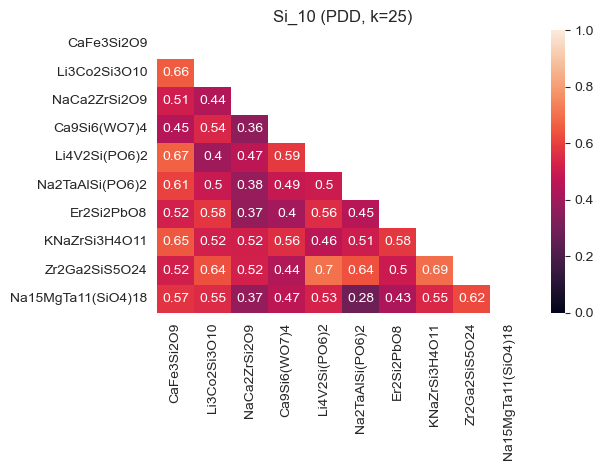

Comparing 10x10 PDDs (k=50): 100%|██████████| 100/100 [00:00<00:00, 629.77it/s]


k=50 : Time_elapsed = 0.3 s


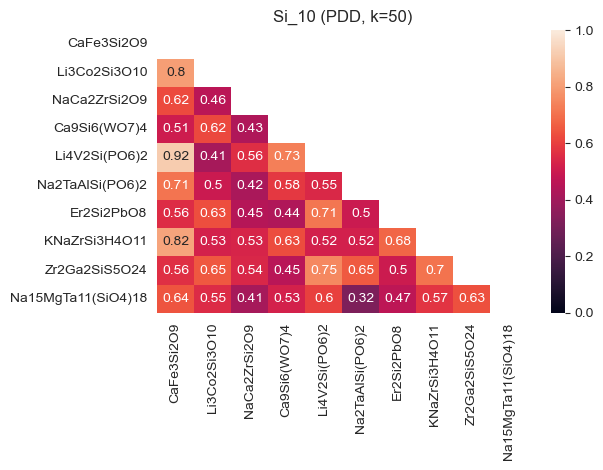

Comparing 10x10 PDDs (k=100): 100%|██████████| 100/100 [00:00<00:00, 589.63it/s]


k=100 : Time_elapsed = 0.3 s


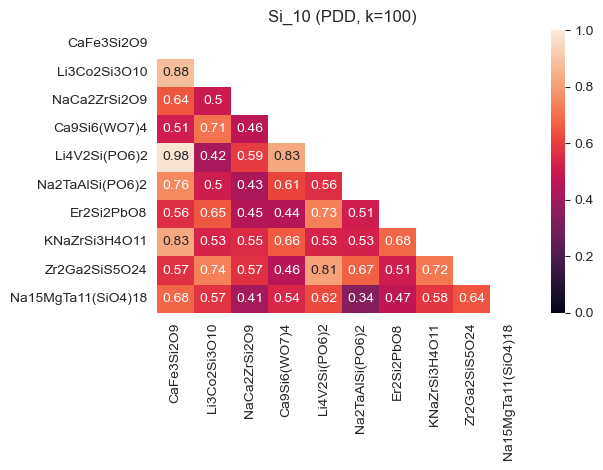

In [36]:
k_list = [5, 10, 25, 50, 100]
method = 'PDD'

for k in k_list:
    start_time = time.time()
    dm = amd.compare(cif_list, cif_list, by=method, k=k)
    print(f'k={k} : Time_elapsed = {time.time() - start_time:.1f} s')
    
    # Plot the heatmap with the mask
    sns.heatmap(dm, mask=mask, annot=True, vmin=0, vmax=1)
    plt.grid(False)
    plt.title(f'{data_key} ({method}, k={k})')
    plt.tight_layout()
    plt.savefig(figure_write_folder / f'test_{method}_{data_key}_{k}.png', dpi=300)
    plt.show()

,CaFe3Si2O9,Li3Co2Si3O10,NaCa2ZrSi2O9,Ca9Si6(WO7)4,Li4V2Si(PO6)2,Na2TaAlSi(PO6)2,Er2Si2PbO8,KNaZrSi3H4O11,Zr2Ga2SiS5O24,Na15MgTa11(SiO4)18
CaFe3Si2O9,True,False,False,False,False,False,False,False,False,False
Li3Co2Si3O10,False,True,False,False,False,False,False,False,False,False
NaCa2ZrSi2O9,False,False,True,False,False,False,False,False,False,False
Ca9Si6(WO7)4,False,False,False,True,False,False,False,False,False,False
Li4V2Si(PO6)2,False,False,False,False,True,False,False,False,False,False
Na2TaAlSi(PO6)2,False,False,False,False,False,True,False,False,False,False
Er2Si2PbO8,False,False,False,False,False,False,True,False,False,False
KNaZrSi3H4O11,False,False,False,False,False,False,False,True,False,False
Zr2Ga2SiS5O24,False,False,False,False,False,False,False,False,True,False
Na15MgTa11(SiO4)18,False,False,False,False,False,False,False,False,False,True


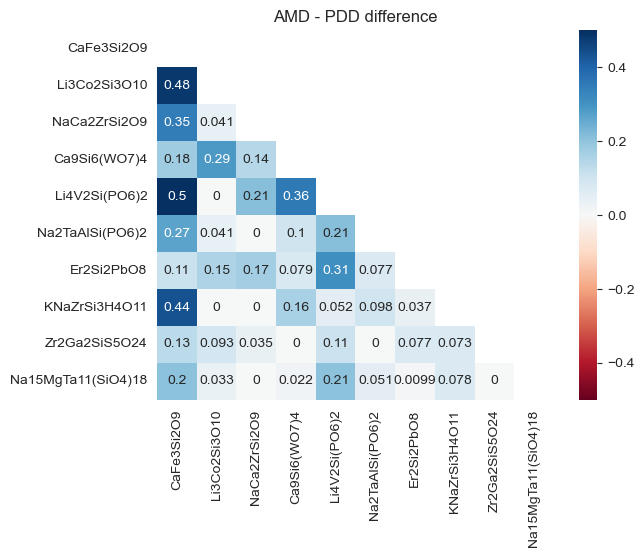

In [34]:
sns.heatmap(dm - dm_10, mask=mask, annot=True, cmap='RdBu', vmin=-0.5, vmax=0.5)
plt.grid(False)
plt.title(f'AMD - PDD difference')
# plt.savefig(figure_write_folder / f'test_amd_{data_key}_{k}.png', dpi=300)

plt.show()

In [ ]:
corr = 